In [1]:
import numpy as np
from matplotlib import pyplot as plt
import nsmod
import os 
from numpy import cos, sin
%matplotlib inline

from nsmod.manual_switching_torque_with_Euler import main
from nsmod import Plot, File_Functions, Physics_Functions

In [2]:
def SignalModel_EM2(theta, t):
    omega0, epsI, a0, chi, epsA = theta
    psidot = -epsI*omega0
    psi = psidot*t + np.pi/2.

    GEOMETRIC = (psidot**2*(2*(sin(chi)*cos(a0) - sin(a0)*sin(psi)*cos(chi))
                      *(sin(chi)*sin(a0)*sin(psi) + cos(chi)*cos(a0))*sin(chi)
                      - ((sin(chi)*sin(psi)*cos(a0) - sin(a0)*cos(chi))**2
                      + sin(chi)**2*cos(psi)**2)*cos(chi))*sin(chi)*sin(a0)
                      *cos(psi)/((sin(chi)*sin(psi)*cos(a0)
                    - sin(a0)*cos(chi))**2 
                      + sin(chi)**2*cos(psi)**2)**2
                        ) / (2*np.pi) 
    

    Sin2Theta = 1 - (sin(a0)*sin(psi)*sin(chi) + cos(a0)*cos(chi))**2
    Phidot = 1 - epsI * sin(chi) * (cos(a0) *sin(chi) - sin(psi) * sin(a0) * cos(chi)) / (
                        (sin(a0)*cos(chi) - cos(a0)*sin(psi)*sin(chi))**2 + (cos(psi) * sin(chi))**2)

    # Standard values for c , R in cgs
    c = 3e10
    R = 1e6
    k = 2/3.0 * R/c * epsA * omega0**3 
    PHIDDOT = -k * Phidot**3 * Sin2Theta / (2*np.pi)

    return PHIDDOT + GEOMETRIC

BETA FUNCTION IS USED
AnomTorque : 1.0000000000e+00
AnomTorqueSwitching : 1.0000000000e+00
Bs : 3.2863353450e+13
DeltaPhi_49 : 1.8288825954e-03
DeltaPhi_49_SpindownTorque : 8.7486937648e-08
DeltaPhi_63 : 1.3873189771e-03
DeltaPhi_75 : 5.2015712615e-04
DeltaPhi_TS : -0.0000000000e+00
EMtorqueAmplificationfactor : 2.3830896076e+00
P : 1.0005072145e-01
SpindownTorqueSwitching : 1.0000000000e+00
SwitchTime : 1.0000000000e+02
T : 1.1400000000e+05
a0 : 3.0000000000e+00
beta : -5.7080168093e-04
chi0 : 8.8000000000e+01
delta_omega_dot0_FP : 7.9502413485e-12
delta_omega_dot0_FP_EM : 6.0307428824e-12
epsA : 3.0000000000e-10
epsI1 : 0.0000000000e+00
epsI3 : 1.0500000000e-06
n : 5.0000000000e+04
nu_dot0 : -2.6246930522e-10
omega0 : 6.2800000000e+01
omega_dot0 : -1.6491432822e-09
tauA : 3.3350240484e+08
tauE : 3.8080378266e+10
tauP : 9.5286401383e+04
tauS : 3.8033997322e+10
upsilon : 0.0000000000e+00
wobble_angle : 5.2372345227e-02
wobble_angle_spindown : 2.5052981054e-06
BETA FUNCTION IS USED
BETA

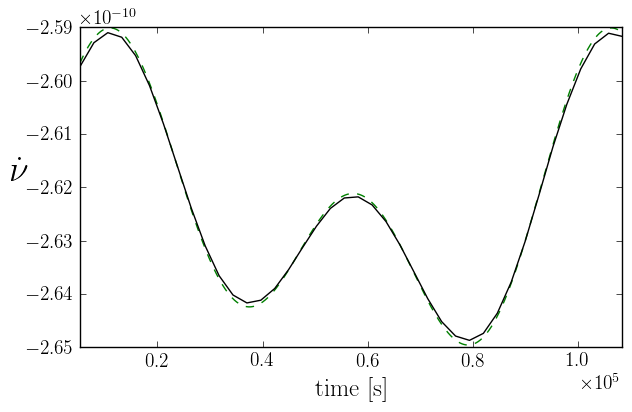

In [3]:
fig, ax = plt.subplots(figsize=(7, 4))

# Parameters
omega0 = 2*np.pi*10
epsI3 = 1.05e-6
epsA = 3e-10
chi0 = 88.0
a0 = 3.0
n = 50000
error = 1e-13

tauP = 1.2 * np.pi/abs(epsI3 * omega0)
T = 2 * tauP


time = np.linspace(0, T, 1000)
theta_EM = np.array([omega0, epsI3, np.radians(a0), np.radians(chi0), epsA])
ax.plot(time, SignalModel_EM2(theta_EM, time), "--", color="g", label="Hybrid")

file_name = main(chi0=chi0, epsI3=epsI3, epsA=epsA, omega0=omega0, T=T, 
                 n=n, error=error, a0=a0, cleanup=True, DryRun=False, 
                 AnomTorque=True)
File_Functions.PrintParameterDictionary(file_name)

ax = Plot.SpindownRate(file_name, ax=ax, analytic="", divisor=9, label="Numerical integration")
PD = File_Functions.Parameter_Dictionary(file_name)

    
plt.show()

BETA FUNCTION IS USED


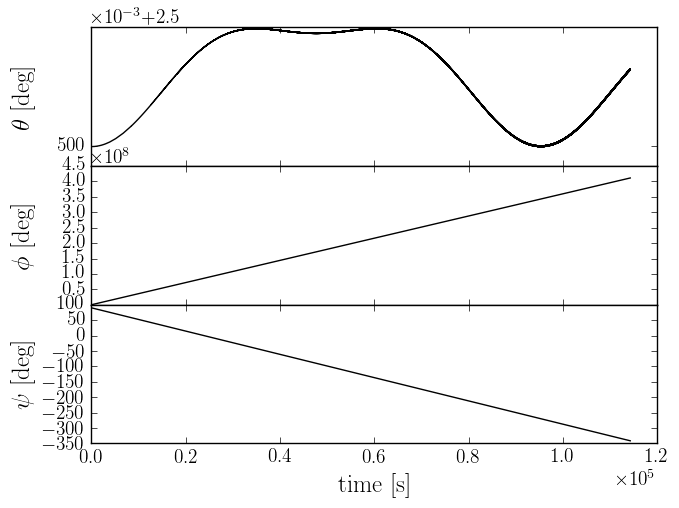

In [4]:
Plot.Euler_Angles(file_name)
plt.show()

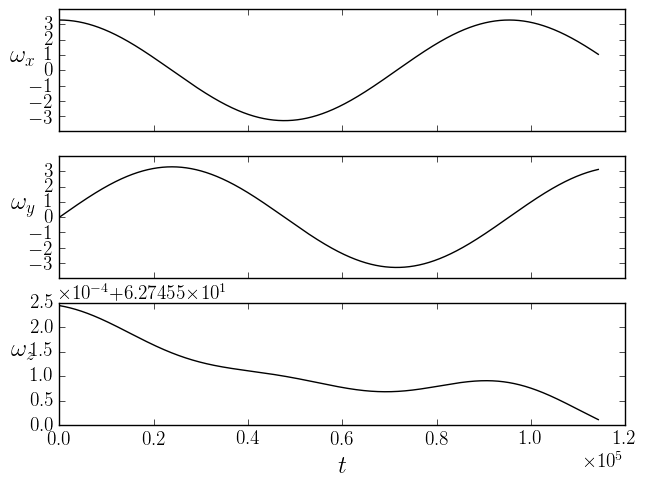

In [5]:
Plot.simple_plot(file_name)
plt.show()